In [1]:
import random
import time
import matplotlib.pyplot as plt

Defining the quicksort algorithm

In [11]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

Defining the mergesort algorithm

In [12]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

Defining the heapsort algorithm

In [13]:
def heapify(arr, n, i):
    largest = i
    l = 2*i + 1
    r = 2*i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    arr = arr.copy()
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

Defining the mergesort algorithm

In [14]:
def counting_sort(arr):
    if not arr:
        return arr
    max_val = max(arr)
    count = [0] * (max_val + 1)
    for num in arr:
        count[num] += 1
    for i in range(1, len(count)):
        count[i] += count[i - 1]
    output = [0] * len(arr)
    for num in reversed(arr):
        output[count[num] - 1] = num
        count[num] -= 1
    return output

Benchmarking the function

In [15]:
def measure_time(sort_func, data):
    start = time.perf_counter()
    sort_func(data.copy())
    end = time.perf_counter()
    return end - start

Generating the datasets

In [ ]:
sizes = [10_000, 100_000, 1000_000]
datasets = {
    "random": [random.choices(range(1000_000), k=size) for size in sizes],
    "sorted": [sorted(random.choices(range(1000_000), k=size)) for size in sizes],
    "reversed": [sorted(random.choices(range(1000_000), k=size), reverse=True) for size in sizes],
}

Running the benchmarks

In [16]:
algorithms = {
    "Quick Sort": quick_sort,
    "Merge Sort": merge_sort,
    "Heap Sort": heap_sort,
    "Counting Sort": counting_sort
}

results = {algo: [] for algo in algorithms}

for algo_name, algo_func in algorithms.items():
    print(f"\n=== {algo_name} ===")
    for size, data in zip(sizes, datasets["random"]):  # only random dataset for simplicity
        t = measure_time(algo_func, data)
        results[algo_name].append(t)
        print(f"{size:,} elements → {t:.4f} sec")


=== Quick Sort ===
10,000 elements → 0.1387 sec
100,000 elements → 1.6677 sec

=== Merge Sort ===
10,000 elements → 0.1480 sec
100,000 elements → 1.8027 sec

=== Heap Sort ===
10,000 elements → 0.3432 sec
100,000 elements → 3.1332 sec

=== Counting Sort ===
10,000 elements → 0.4392 sec
100,000 elements → 0.6626 sec


Plotting the graphs

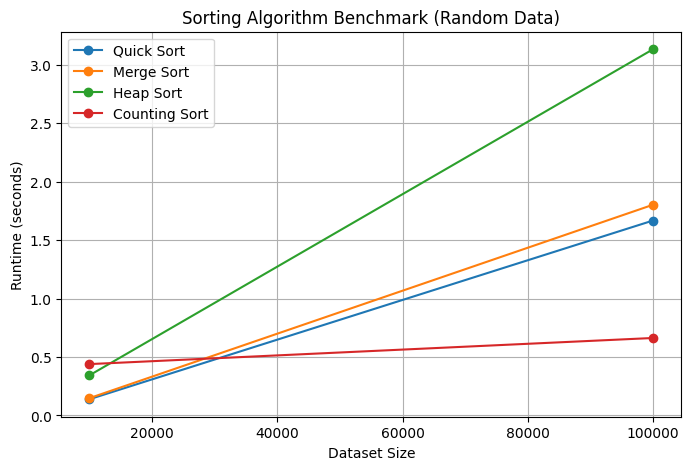

In [17]:
plt.figure(figsize=(8,5))
for algo_name, times in results.items():
    plt.plot(sizes, times, marker='o', label=algo_name)

plt.title("Sorting Algorithm Benchmark (Random Data)")
plt.xlabel("Dataset Size")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.grid(True)
plt.show()

Running benchmarks for Random data...
Running benchmarks for Sorted data...
Running benchmarks for Reverse-sorted data...


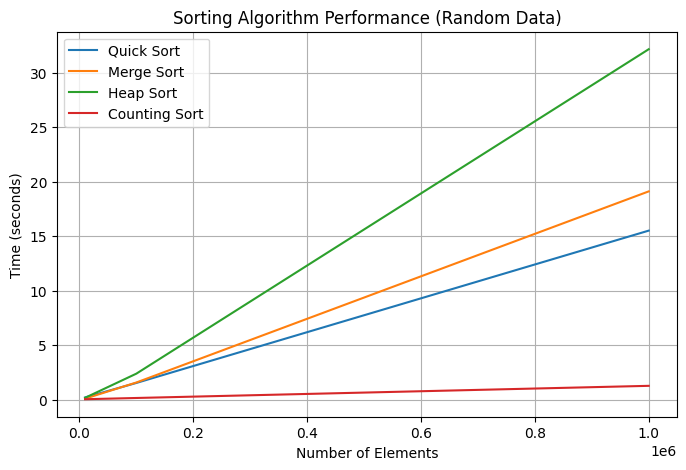

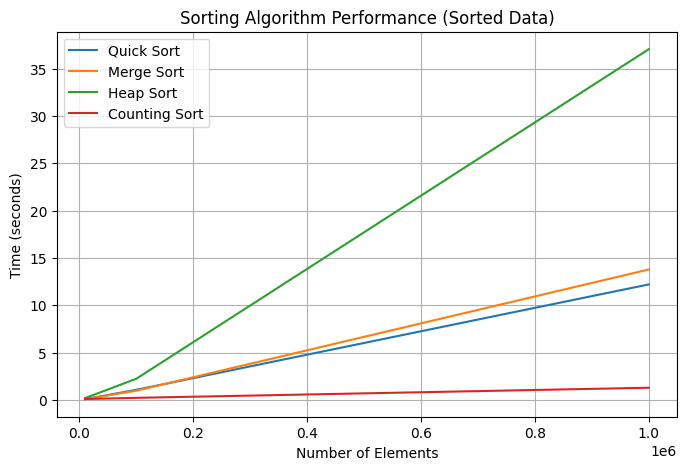

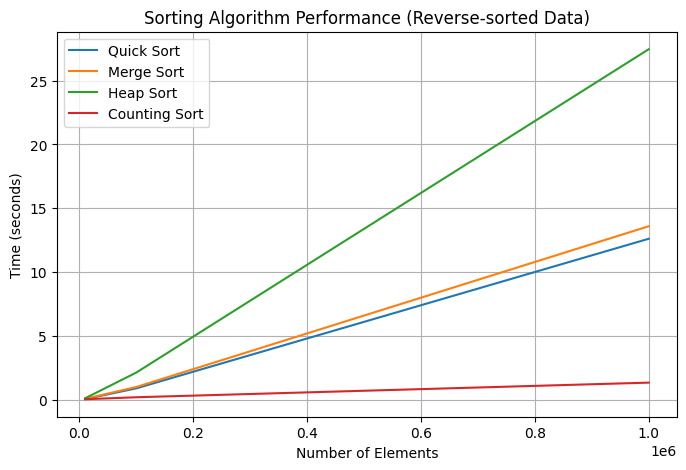

In [18]:
import random
import time
import matplotlib.pyplot as plt

# --- Sorting functions (define these above this block) ---

def measure_time(sort_func, data):
    start = time.perf_counter()
    sort_func(data.copy())
    end = time.perf_counter()
    return end - start

sizes = [10_000, 100_000, 1_000_000]
sorts = {
    "Quick Sort": quick_sort,
    "Merge Sort": merge_sort,
    "Heap Sort": heap_sort,
    "Counting Sort": counting_sort
}
data_types = ["Random", "Sorted", "Reverse-sorted"]

results = {dtype: {} for dtype in data_types}

for dtype in data_types:
    print(f"Running benchmarks for {dtype} data...")
    for name, func in sorts.items():
        times = []
        for size in sizes:
            data = [random.randint(0, 100000) for _ in range(size)]
            if dtype == "Sorted":
                data.sort()
            elif dtype == "Reverse-sorted":
                data.sort(reverse=True)
            t = measure_time(func, data)
            times.append(t)
        results[dtype][name] = times

# --- Plotting ---
for dtype in data_types:
    plt.figure(figsize=(8,5))
    for name, times in results[dtype].items():
        plt.plot(sizes, times, label=name)
    plt.title(f"Sorting Algorithm Performance ({dtype} Data)")
    plt.xlabel("Number of Elements")
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.grid(True)
    plt.show()